## <center> CS559 Machine Learning: Fundamentals and Applications</center>
<center> Fall 2022 HW5</center>
<center>Due: 12/16/2022 Friday 11:59 PM </center>

Homework assignments will be done individually: each student must hand in their own answers. Use of partial or entire solutions obtained from others or online is strictly prohibited. Electronic submission on Canvas is mandatory.

# Graphical Models (30 pts)

Consider following tables:

||p(C)|
|----|----|
|F|0.65|
|T|0.35|

|C|p(S=F)|p(S=T)|p(R=F)|p(R=T)|
|--|--|--|--|--|
|F|0.7|0.3|0.8|0.2|
|T|0.8|0.2|0.2|0.8|

|S|R|p(W=T)|p(W=F)|
|-|-|---|---|
|F|F|0.96|0.04|
|T|F|0.15|0.85|
|F|T|0.17|0.83|
|T|T|0.02|0.98|

a.	(5 pts) Using pgmpy, draw a conditional directed graph.

In [53]:
! pip install scikit-learn scipy matplotlib
! pip install pandas
! pip install numpy
! pip install pgmpy
! pip install opencv-python
! pip install daft 

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 15.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 3.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 25.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 58.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 8.4 MB/s eta 0:00:0000:0100:0

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
import daft
from daft import PGM

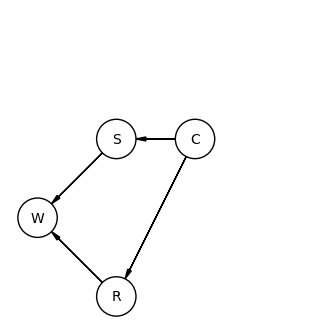

In [45]:
pgm = PGM(shape=[4, 4])

pgm.add_node(daft.Node('C', r"C", 5, 5))
pgm.add_node(daft.Node('R', r"R", 4, 3))
pgm.add_node(daft.Node('S', r"S", 4, 5))
pgm.add_node(daft.Node('W', r"W", 3, 4))


pgm.add_edge('C', 'R')
pgm.add_edge('C', 'S')
pgm.add_edge('R', 'W')
pgm.add_edge('S', 'W')


pgm.render()
plt.show()

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
import sklearn as sk
import sklearn
%matplotlib inline

b.	(5 pts) Calculate a probability p(C,S,R,W)


p(C,S,R,W) = p(C)*p(S|C)*p(R|C)*p(W|R,S)

Case 1 : C = T, S = T, R = T, W = T <br>
Case 2 : C = F, S = T, R = T, W = T <br>
Case 3 : C = F, S = F, R = T, W = T <br>
Case 4 : C = F, S = F, R = F, W = T <br>
Case 5 : C = F, S = F, R = F, W = F

In [49]:
# Case 1 :
c1 = 0.35 * 0.2 * 0.8 * 0.02
print(c1)

# Case 2 :
c2 = 0.65 * 0.3 * 0.8 * 0.02
print(c2)

# Case 3 :
c3 = 0.65 * 0.7 * 0.2 * 0.17
print(c3)

# Case 4 :
c4 = 0.65 * 0.7 * 0.8 * 0.96
print(c4)

# Case 5 :
c5 = 0.65 * 0.7 * 0.8 * 0.04
print(c5)

0.00112
0.003120000000000001
0.015470000000000001
0.34944
0.01456


c.	(5 pts) Calculate a probability p(S=T|W=T).

In [51]:
# p(S=T|W=T) = sum(p(S=T, W=T, C, R)) / sum((W=T, S, R, C))

# Solving for numerator
# s=t, w=t, c=t, r=t
sum_num = 0
sum_num = sum_num + (0.2*0.02*0.35*0.8) 

# s=t, w=t, c=f, r=t

sum_num += (0.3*0.020*0.65*0.2)

# s=t, w=t, c=t, r=f

sum_num += (0.2*0.15*0.35*0.2)

# s=t, w=t, c=f, r=f

sum_num += (0.3*0.15*0.35*0.2)

# Solving for denominator
deno_sum = sum_num

# W=T, S=f, R=t, C=t
deno_sum += (0.17*0.8*0.8*0.35)

# W=T, S=f, R=f, C=t
deno_sum += (0.96*0.8*0.2*0.35)

# W=T, S=f, R=f, C=f
deno_sum += (0.96*0.7*0.8*0.65)

print(sum_num / deno_sum)


0.015944517538969295


d.	(10 pts) Using a provided data table, `GM_train.csv`, train a graphical model using `pgmpy.models.BayesianModel` and report the accuracy. The target is W. 

In [57]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
from sklearn.metrics import accuracy_score

In [56]:
df_train = pd.read_csv('GM_train.csv')
df_test = pd.read_csv('GM_test.csv')

In [62]:
gm = BayesianModel([('C', 'R'), ('C', 'S'), ('R', 'W'), ('S', 'W')])
gm.fit(df_train)

pred = gm.predict(df_train.drop('W',axis=1))
print(accuracy_score(df_train['W'], pred))

/home/z/.local/lib/python3.10/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(
100%|██████████| 8/8 [00:00<00:00, 6712.23it/s]

0.57


e.	(5 pts) Generalize the model trained in **d** using `GM_test.csv`.

In [63]:
pred = gm.predict(df_test.drop('W',axis=1))
print(accuracy_score(df_test['W'], pred))

100%|██████████| 8/8 [00:00<00:00, 5945.15it/s]

0.56


# Handwriting recognition: (70 pts)
Handwriting recognition is a well-studied subject in computer vision and has found wide applications in our daily life (such as USPS mail sorting). In this project, we will explore various machine learning techniques for recognizing handwriting digits. The dataset you will be using is the well-known MINST dataset.

(1)	The MNIST database of handwritten digits has a training set of 60,000 examples, and a test set of 10,000 examples. (http://yann.lecun.com/exdb/mnist/)

(2)	Below is an example of some digits from the MNIST dataset.

![Image of MINST](https://datasets.activeloop.ai/wp-content/uploads/2019/12/MNIST-handwritten-digits-dataset-visualized-by-Activeloop.webp)

(3)	The goal of this assignment is to build a 10-class classifier to recognize those handwriting digits as accurately as you can.  All the assignments below should use the training data (60K examples) and test data (10 K examples) as given by the dataset.

a.	(30 pts) Build several non-deep learning based classifiers using all pixels as features for handwriting recognition. You need to use at least **three techniques** we have learned from the class to do the work.

In [23]:
mnist_test = pd.read_csv('./mnist-in-csv/mnist_test.csv')
mnist_train = pd.read_csv('./mnist-in-csv/mnist_train.csv')

mnist_test_without_cols = mnist_test[1:]
mnist_train_without_cols = mnist_train[1:]

In [24]:
X_train = mnist_train_without_cols.iloc[:, 1:]
X_train = np.array(X_train, dtype=int)

X_test = mnist_test_without_cols.iloc[: , 1:]
X_test = np.array(X_test, dtype=int)

y_train = np.array(mnist_train_without_cols['label'], dtype=int)
y_test = np.array(mnist_test_without_cols['label'], dtype=int)

In [25]:
# Decision Trees
from sklearn import tree

dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

accuracy = np.sum(dt_pred == y_test) / len(y_test)
print("accuracy of decision tree is : ", accuracy)

accuracy of decision tree is :  0.8786878687868787


In [26]:
# Gaussian Naive Bayes 
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

accuracy = np.sum(y_pred == y_test) / len(y_test)
print("accuracy of Gaussian Naive Bayes is : ", accuracy)

accuracy of Gaussian Naive Bayes is :  0.5558555855585559


In [27]:
# Logistic Regression with softmax
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(multi_class="multinomial", max_iter=1000)
y_pred1 = lr.fit(X_train, y_train).predict(X_test)

accuracy = np.sum(y_pred == y_test) / len(y_test)
print("accuracy of Logistic Regression with softmax is : ", accuracy)

accuracy of Logistic Regression with softmax is :  0.5558555855585559


/home/z/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
y_pred_knn = knn.fit(X_train, y_train).predict(X_test)

accuracy = np.sum(y_pred_knn == y_test) / len(y_test)
print("accuracy of Logistic Regression with softmax is : ", accuracy)

accuracy of Logistic Regression with softmax is :  0.9664966496649665


b.	(10 pts) In this assignment, we will explore various techniques related to a neural network with hidden layers of more than 3 to solve the 10-class classification problem.

Since there are many existing implementations to solve the MINST problem, we need to give some twists to this problem to make it worthwhile to do for our final assignment. (Please refer to the ranking list for MNIST at http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html.)

The basic network structure that we are trying to explore is something like the following (i.e., the fully connected deep neural nets). The number of hidden layers and the size of each hidden layer in terms of neurons are left as tuning parameters that you can explore.

![Image of NN](https://pimages.toolbox.com/wp-content/uploads/2022/05/18113202/The-Architecture-of-a-Neural-Network.png)

In [29]:
# Neural network with 4 hidden layers
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100, 100))
# mlp.n_layers_ = 3
y_pred_mlp = mlp.fit(X_train, y_train).predict(X_test)

accuracy = np.sum(y_pred_mlp == y_test) / len(y_test)
print("accuracy of neural network with 4 hidden layers is :", accuracy)

accuracy of neural network with 4 hidden layers is : 0.9737973797379738


c.	(30 pts) This assignment reflects the data collection process.
- Hand write 5 styles of your own digits from 0 to 9 on a paper, and make sure your own handwritings are for sure recognizable by yourself. Please take a picture of each digit you write (so you have total 5 x 10 = 50 images), resize and convert it to the same data input format as the MNIST dataset. In other words, you have 50 new data points with labels.
- Treat these 50 images as “brand-new” test dataset and run your own ML models from Question a and b on these 50 images and report the achieved test accuracy. Note, the goal for this exercise is not for achieving “high” accuracy, but to show what potential gaps there may be between existing MNIST dataset and your own test dataset, a scenario you would encounter in real life.
- Use the following code for the image loading. 


In [30]:
#Import the Photos
from matplotlib import pyplot as plt
import cv2
import os

rootdir = "."

def read_img(img_path):
    img = cv2.imread(img_path)
    x_img = np.array([0] * 784)


    for i in range(28):
        for j in range(28):
            idx = i * 28 + j
            x_img[idx] = 255 - img[i][j][0]
            
    return x_img, img
    
X_mydigits = []
Y_mydigits = []
digit_imgs = []

# read handwritten digits
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        if file.endswith(".jpg"):
            # print(file)
            path = os.path.join(subdir, file)
            digit, img = read_img(path)
            # print("Something happened")
            # label = int(os.path.splitext(subdir)[0][-1])
            label = int(file.split('.')[0])
            # print("label bruh #", label)
            X_mydigits.append(digit)
            Y_mydigits.append(label)
            digit_imgs.append(img)


X_mydigits = np.array(X_mydigits)
Y_mydigits = np.array(Y_mydigits)

print(len(Y_mydigits))

50


In [33]:
# From Question a
# Decision Tree
dt_my_hand_predictions = dt.predict(X_mydigits)

accuracy = np.sum(dt_my_hand_predictions == Y_mydigits) / len(Y_mydigits)
print("accuracy of decision tree is : ", accuracy)

accuracy of Logistic Regression with softmax is :  0.1


In [35]:
# From Question a
# Gaussian Naive Bayes
gnb_my_hand_predictions = gnb.predict(X_mydigits)

accuracy = np.sum(gnb_my_hand_predictions == Y_mydigits) / len(Y_mydigits)
print("accuracy of Gaussian Naive Bayes is : ", accuracy)

accuracy of Gaussian Naive Bayes is :  0.1


In [38]:
# From Question a
# Logistic Regression with softmax
lr_my_hand_predictions = lr.predict(X_mydigits)

accuracy = np.sum(lr_my_hand_predictions == Y_mydigits) / len(Y_mydigits)
print("accuracy of Logistic Regressor with softmax is : ", accuracy)

accuracy of Logistic Regressor with softmax is :  0.1


In [37]:
# From Question a
# KNN Classifier
knn_my_hand_predictions = knn.predict(X_mydigits)

accuracy = np.sum(knn_my_hand_predictions == Y_mydigits) / len(Y_mydigits)
print("accuracy of KNN classifier is : ", accuracy)

accuracy of KNN classifier is :  0.1


In [39]:
# From Question b
# Neural network with 4 hidden layers
mlp_my_hand_predictions = mlp.predict(X_mydigits)

accuracy = np.sum(mlp_my_hand_predictions == Y_mydigits) / len(Y_mydigits)
print("accuracy of Neural network with 4 hidden layers : ", accuracy)

accuracy of Neural network with 4 hidden layers :  0.1


In [32]:
#Showing all my images
# temp_img = ''
# for i in range(5):
#     hor = ''
#     for j in range(10):
#         idx = i*10 + j
#         img = digit_imgs[idx]
#         if j == 0:
#             hor = img
#         else:
#             hor = np.hstack((hor, img))
#     if i == 0:
#         temp_img = hor
#     else:
#         temp_img = np.vstack((temp_img, hor))

# plt.imshow(temp_img)
# plt.axis('off')
# plt.show()

d.	In submission, the following is required for this assignment 
- Show all 50 images you create with the corresponding labels you intend to assign, 
- Make a table to show the test accuracy on these 50 images for each ML model you obtained from questions a to c.
- Submit in a subfolder with your 50 handwriting dataset in MNIST format. 
